In [ ]:
!pip install pandas

In [18]:
import pandas as pd

data_df = pd.read_csv('data.csv')
unknown_df = pd.read_csv('unknown.csv')
video_df = pd.read_csv('video.csv')

In [19]:
known_face_count=len(data_df)+len(video_df)
print(f"len of known faces: {known_face_count}")
print(f"Len unknown_df: {len(unknown_df)}")


len of known faces: 6617
Len unknown_df: 3063


In [20]:
known_face= pd.concat([data_df,video_df], ignore_index=True)
known_face=known_face.sample(frac=1).reset_index(drop=True)
known_face=known_face[:3000]
len(known_face)

3000

In [21]:
#shuffle the data and take 3000 samples from  unknown_df 
unknown_df=unknown_df.sample(frac=1).reset_index(drop=True)
unknown_df=unknown_df[:3000]
len(known_face)

3000

In [24]:
df= pd.concat([known_face,unknown_df], ignore_index=True)
df["face_data"] = df["face_data"].apply(eval)
df = df.sample(frac=1).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)


In [25]:
df.head()

,face_data,id
0,"[3, 2, 252, 253, 253, 254, 0, 252, 3, 4, 254, ...",1
1,"[2, 5, 1, 1, 5, 2, 5, 252, 7, 255, 253, 1, 255...",0
2,"[255, 2, 1, 3, 2, 253, 3, 253, 255, 0, 255, 6,...",0
3,"[2, 253, 252, 253, 253, 254, 0, 254, 8, 0, 252...",0
4,"[2, 2, 253, 0, 253, 253, 1, 253, 0, 1, 253, 2,...",1


In [26]:
df.describe()

,id
count,6000.000000
mean,0.500000
std,0.500042
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [27]:
len(df)

6000

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   face_data  6000 non-null   object
 1   id         6000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 93.9+ KB


In [29]:
df["id"].value_counts()

id
1    3000
0    3000
Name: count, dtype: int64

In [ ]:
!pip install scikit-learn

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import json
import pickle
from sklearn.metrics import classification_report

In [29]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
#plotting the points between the df["face_data"], df["id"]


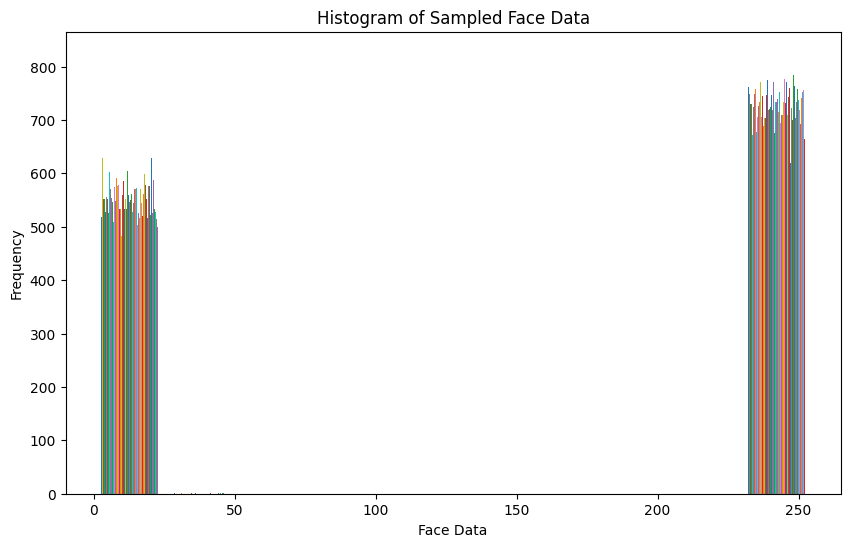

In [32]:
import numpy as np
sample_size = 1000  # Define the size of the sample
sample = np.random.choice(df["face_data"], size=sample_size, replace=False)  # Take a random sample from df["face_data"]

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=10)
plt.xlabel("Face Data")
plt.ylabel("Frequency")
plt.title("Histogram of Sampled Face Data")
plt.show()


In [33]:
def run_model():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df["face_data"], df["id"], test_size=0.2, random_state=42)
    # Create the SVM model
    clf = svm.SVC(kernel='linear')
    # clf = svm.SVC(kernel='poly', degree=3)
    # clf = svm.SVC(kernel='rbf')
    # clf = svm.SVC(kernel='sigmoid')
    # Train the model on the training set
    clf.fit(list(X_train), list(y_train))
    # Test the model on the testing set
    y_pred = clf.predict(list(X_test))
    # Calculate the accuracy of the model
    acc = accuracy_score(list(y_test), y_pred)
    #display accuracy
    report_dict = classification_report(list(y_test), y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    print("Classification Report:")
    print(report_df)
    print("Accuracy: ",acc)
    pickle.dump(clf, open('svm_model.pkl', 'wb'))
    print('Model saved as :blue[model.pkl] file')

unique_ids = df['id'].unique()
if len(unique_ids) < 2:
    print("Insufficient unique IDs to run the SVM multiclass model. At least two unique IDs are required.")
else:
    run_model()

Classification Report:
              precision    recall  f1-score      support
0              0.995066  0.998350  0.996705   606.000000
1              0.998311  0.994949  0.996627   594.000000
accuracy       0.996667  0.996667  0.996667     0.996667
macro avg      0.996688  0.996650  0.996666  1200.000000
weighted avg   0.996672  0.996667  0.996667  1200.000000
Accuracy:  0.9966666666666667
Model saved as :blue[model.pkl] file


In [34]:
import pickle
with open("./svm_model.pkl", "rb") as f:
    svm_model = pickle.load(f)

In [35]:
person_id = svm_model.predict([df["face_data"][300]])
print("Actual ID: ", df["id"][300])
print("Predicted ID: ", person_id[0])



Actual ID:  0
Predicted ID:  0
